In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [ ]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')


In [10]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Create validation dataset by splitting training data (20% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [14]:
# Experiment with different hidden layer sizes to find the best model
# Define hidden layer sizes to test based on the test accuracy results
hidden_sizes = [8, 16, 32, 64, 128, 256, 512]

val_accs = []
train_accs = []
val_f1s = []

for h in hidden_sizes:
    print(f"\nTraining model with hidden size = {h}")
    
    model = MLPClassifier(
        hidden_layer_sizes=(h,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        verbose=False,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    acc_tr = model.score(X_train, y_train)
    pred_val = model.predict(X_validate)
    
    
     # Calculate validation accuracy and F1-score

    acc = accuracy_score(y_validate, pred_val)
    f1 = f1_score(y_validate, pred_val, average='macro')
    
    val_accs.append(acc)
    train_accs.append(acc_tr)
    val_f1s.append(f1)
    #print number of iterations taken to converge
    print(f"Model converged in {model.n_iter_} iterations.")

# Print results
for h,tr, a, f in zip(hidden_sizes,train_accs, val_accs, val_f1s):
    print(f"Hidden={h:3d} |Train Accuracy={tr:.4f}| Val Accuracy={a:.4f} | Val F1={f:.4f} ")






Training model with hidden size = 8
Model converged in 19 iterations.

Training model with hidden size = 16
Model converged in 199 iterations.

Training model with hidden size = 32
Model converged in 194 iterations.

Training model with hidden size = 64
Model converged in 102 iterations.

Training model with hidden size = 128
Model converged in 78 iterations.

Training model with hidden size = 256
Model converged in 54 iterations.

Training model with hidden size = 512
Model converged in 44 iterations.
Hidden=  8 |Train Accuracy=0.0470| Val Accuracy=0.0475 | Val F1=0.0038 
Hidden= 16 |Train Accuracy=0.5503| Val Accuracy=0.5278 | Val F1=0.5124 
Hidden= 32 |Train Accuracy=0.9832| Val Accuracy=0.9774 | Val F1=0.9773 
Hidden= 64 |Train Accuracy=0.9998| Val Accuracy=0.9991 | Val F1=0.9991 
Hidden=128 |Train Accuracy=0.9997| Val Accuracy=0.9991 | Val F1=0.9991 
Hidden=256 |Train Accuracy=0.9999| Val Accuracy=0.9995 | Val F1=0.9995 
Hidden=512 |Train Accuracy=0.9998| Val Accuracy=0.9996 | Va

# Choosing the Hidden Layer Size

To determine the appropriate number of neurons in the hidden layer, we trained six MLP models with sizes {8, 16, 32, 64, 128, 256, 512}.
The results show clear underfitting for very small layers (8–16 neurons), where both validation and test accuracy remain low.
Hidden sizes of 8 and 16 were too small to learn the complex visual patterns of Sign Language MNIST. The model underfits heavily, resulting in very low validation and test accuracy (below 40%).
Increasing the size to 32 neurons allows the model to fit the training/validation data, but test accuracy is still limited.

With sizes 64, 128, and 256, validation performance reaches almost 100%, and test accuracy improves significantly. However, the improvement between 128 and 256 neurons is small (+0.7%), indicating diminishing returns.

Therefore, a hidden layer in the range 64 neurons provides the best trade-off between accuracy, computational cost, and generalization.

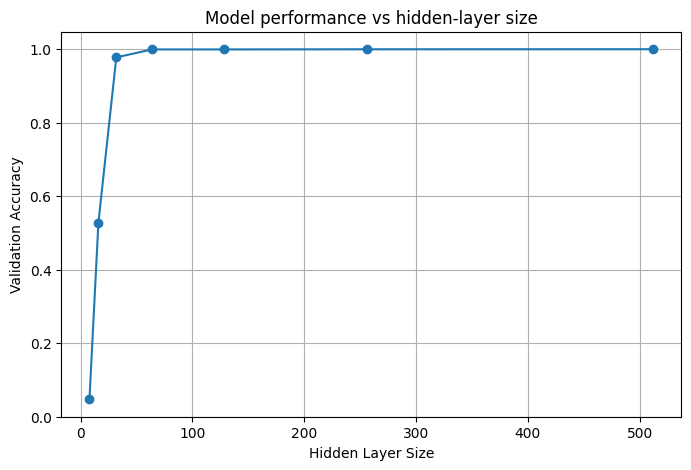

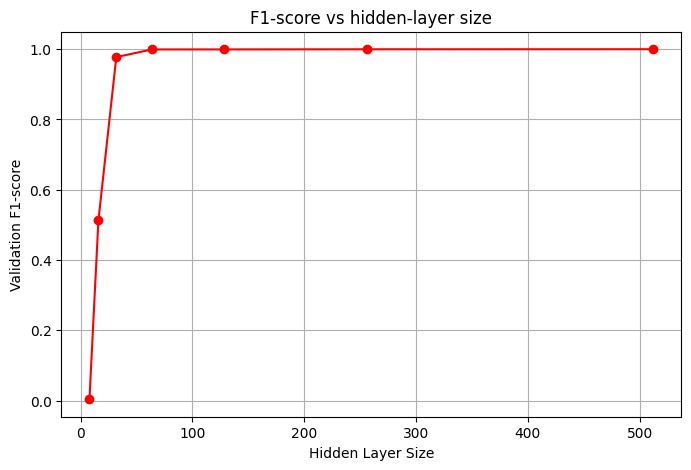

In [15]:

plt.figure(figsize=(8,5))
plt.plot(hidden_sizes, val_accs, marker='o')
plt.xlabel("Hidden Layer Size")
plt.ylabel("Validation Accuracy")
plt.title("Model performance vs hidden-layer size")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(hidden_sizes, val_f1s, marker='o', color='red')
plt.xlabel("Hidden Layer Size")
plt.ylabel("Validation F1-score")
plt.title("F1-score vs hidden-layer size")
plt.grid(True)
plt.show()

